In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
sensex = pd.read_csv('datasets/SESN.csv')
nifty = pd.read_csv('datasets/NSE.csv')

In [254]:
index = pd.DataFrame({'sensex': sensex['Adj Close'],
                       'nifty': nifty['Adj Close']})

In [255]:
index = index.pct_change()
index = index.iloc[1: ,:] * 100
index = index[(index['sensex'] > -2) & (index['sensex'] < 2) ]
index.head()

,sensex,nifty
1,1.949721,2.029136
2,1.501506,1.448666
3,0.160484,0.130424
4,0.051732,-0.000672
5,0.546369,0.621218


In [256]:
index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1 to 1231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sensex  1168 non-null   float64
 1   nifty   1168 non-null   float64
dtypes: float64(2)
memory usage: 27.4 KB


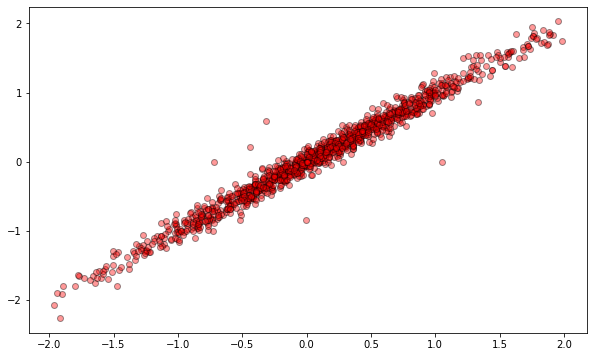

In [257]:
plt.figure(figsize = (10, 6))
plt.scatter(index['sensex'], index['nifty'], edgecolor = 'black', color = 'red', alpha = 0.4);

In [258]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
train_set , test_set  = train_test_split(index, test_size = 0.2, random_state = 20)

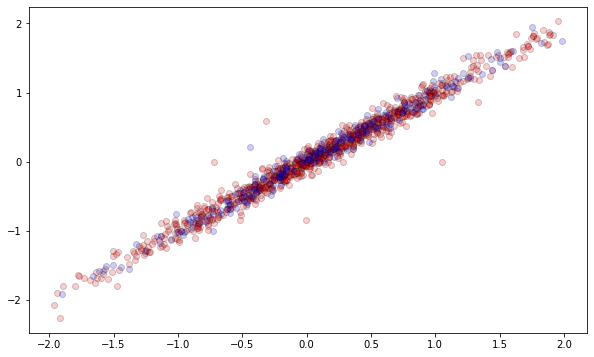

In [259]:
plt.figure(figsize = (10, 6))
plt.scatter(train_set['sensex'], train_set['nifty'], edgecolor = 'black', color = 'red', alpha = 0.2)
plt.scatter(test_set['sensex'], test_set['nifty'], edgecolor = 'black', color = 'blue', alpha = 0.2);

In [260]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X = train_set['sensex']
X = X.values.reshape(X.size, 1)
y = train_set['nifty']
linreg.fit(X, y)

print(linreg.intercept_)
print(linreg.coef_)

-0.003296592800410156
[0.98929844]


In [261]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linreg, X, y, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-scores)

In [262]:
def score_info(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('SD: ', scores.std())

In [263]:
score_info(lin_rmse_scores)

Scores:  [0.08664176 0.1085949  0.0955451  0.13851841 0.09554096 0.13949452
 0.14478822 0.12742967 0.09588639 0.10544226]
Mean:  0.11378821954558556
SD:  0.02058954032063226


In [264]:
pred = test_set['sensex'].values.reshape(test_set['sensex'].size, 1)
nifty_prediction = linreg.predict(pred)

In [265]:
from sklearn.metrics import mean_squared_error
nifty_actual = test_set['nifty']
lin_mse = mean_squared_error(nifty_prediction, nifty_actual)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.10449759556526719